In [161]:
import pickle
import sys
import math
sys.path.append("..")
from lsc_verb_noun_pairs import LSCVerbClasses
import main
from lsc_subj_intransitive_verbs import SubjectIntransitiveVerbClasses
import lsc_subj_obj_transitive_verbs
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
path = "../../out/"

iterations = [x * 5 for x in range(31)] #[0,5,10,15,20,25,30,35,40,45,50,45,50]
clusters = [5,10,20,30,40,50,75,100,200,300]
accuracies = dict()
likelihoods = dict()

for cluster in clusters:
    model_path = path + "all_pairs_lcs-" + str(cluster)+"-150.pkl"
    model = pickle.load(open(model_path, 'rb'))
    accuracies[cluster] = model.accuracies
    likelihoods[cluster] = model.likelihoods


# accuracy per cluster

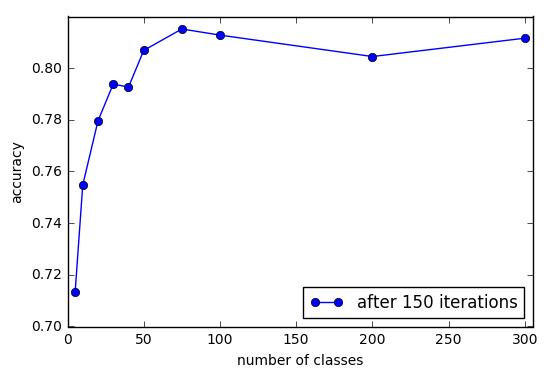

In [163]:
n_of_iterations = 150
data =  [(cluster, accuracies[cluster][n_of_iterations])  for cluster in clusters]

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
line1, = plt.plot(x_val,y_val, marker = 'o',label="after " + str(i) + " iterations")
plt.legend(handles=[line1], loc=4)
plt.axis([0, 305, 0.70, 0.82])
plt.xlabel('number of classes')
plt.ylabel('accuracy')
plt.savefig('accuracy_clusters.png')
plt.show()

# accuracy per iteration

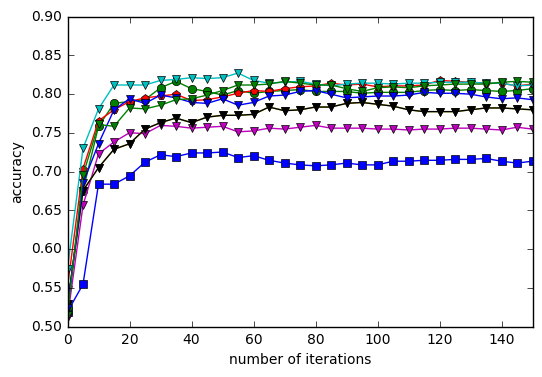

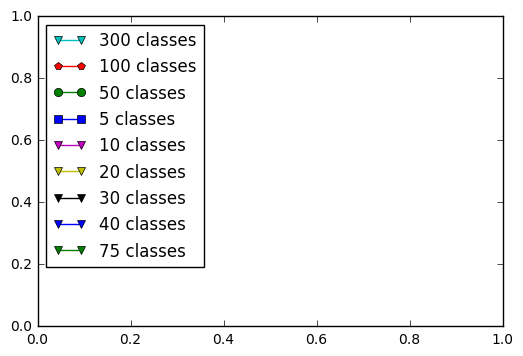

In [183]:

# data =  [(cluster, accuracies[cluster][150])  for cluster in clusters]
# 5,10,20,30,40
x_val = iterations
y_val_5 = [accuracies[5][iteration] for iteration in iterations]
y_val_10 = [accuracies[10][iteration] for iteration in iterations]
y_val_20 = [accuracies[20][iteration] for iteration in iterations]
y_val_30 = [accuracies[20][iteration] for iteration in iterations]
y_val_40 = [accuracies[40][iteration] for iteration in iterations]
y_val_50 = [accuracies[50][iteration] for iteration in iterations]
y_val_75 = [accuracies[75][iteration] for iteration in iterations]
y_val_100 = [accuracies[100][iteration] for iteration in iterations]
y_val_300 = [accuracies[300][iteration] for iteration in iterations]

line1, = plt.plot(x_val,y_val_5,  marker='s', label="5 classes" )
line2, = plt.plot(x_val,y_val_50, marker='o', label="50 classes" )
line3, = plt.plot(x_val,y_val_100, marker='p', label="100 classes" )
line4, = plt.plot(x_val,y_val_300, marker='v', label="300 classes" )

#extra
line5, = plt.plot(x_val,y_val_10, marker='v', label="10 classes" )
line6, = plt.plot(x_val,y_val_20, marker='v', label="20 classes" )
line7, = plt.plot(x_val,y_val_30, marker='v', label="30 classes" )
line8, = plt.plot(x_val,y_val_40, marker='v', label="40 classes" )
line9, = plt.plot(x_val,y_val_75, marker='v', label="75 classes" )

# plt.legend(handles=[line4,line3,line2,line1,line5,line6,line7,line8,line9], loc=4)
plt.axis([0, 150, 0.50, 0.90])
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
# plt.axis('tight')
plt.savefig('accuracy_iterations.pdf')
plt.show() 



plt.legend(handles=[line4,line3,line2,line1,line5,line6,line7,line8,line9], loc=2)

plt.show() 

# Likelihoods step 1

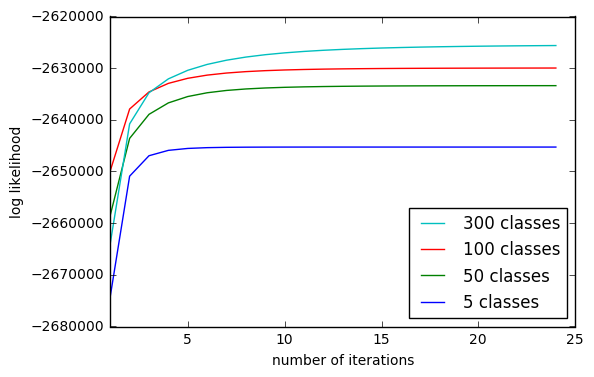

In [184]:
# data =  [(cluster, likelihoods[cluster][50])  for cluster in clusters]
max_iter = 25


x_val = range(1,max_iter)
y_val_5 = [likelihoods[5][iteration]for iteration in range(1,max_iter)]
# y_val_50 = [math.log1p( -likelihoods[50][iteration]) for iteration in range(1,max_iter)]
y_val_50 = [likelihoods[50][iteration] for iteration in range(1,max_iter)]
y_val_100 = [likelihoods[100][iteration] for iteration in range(1,max_iter)]
y_val_300 = [likelihoods[300][iteration] for iteration in range(1,max_iter)]

line1, = plt.plot(x_val,y_val_5,   label="5 classes" )
line2, = plt.plot(x_val,y_val_50,  label="50 classes" )
line3, = plt.plot(x_val,y_val_100,  label="100 classes" )
line4, = plt.plot(x_val,y_val_300,  label="300 classes" )

plt.legend(handles=[line4,line3,line2,line1], loc=4)
# plt.axis([0, 150, 0.50, 0.82])
plt.xlim([1, max_iter])
# plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('log likelihood')
plt.savefig('likelihood_part1.pdf')
plt.show() 

# likelihood step 2

In [167]:
path = "../../out/"
clusters = [5,50,100,300]
likelihoods = dict()

for cluster in clusters:
    model_path = path + "all_pairs_intransitive_class-" + str(cluster)+"-150.pkl"
    model = pickle.load(open(model_path, 'rb'))
    likelihoods[cluster] = model.likelihoods

2645269.64359 2674177.18751
2633375.59982 2658456.78674
2629953.77727 2649863.48763
2625453.30762 2663929.20177


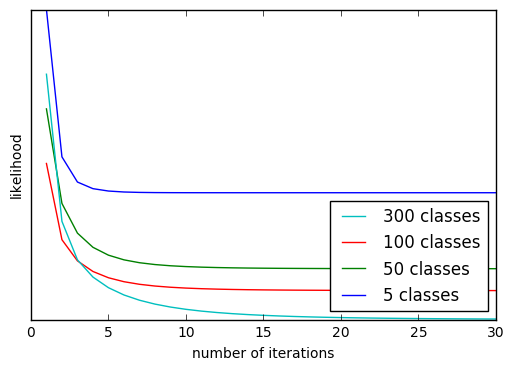

In [181]:
# data =  [(cluster, likelihoods[cluster][50])  for cluster in clusters]

x_val = range(1,50)
y_val_5 = [-likelihoods[5][iteration] for iteration in range(1,50)]
y_val_50 = [-likelihoods[50][iteration] for iteration in range(1,50)]
y_val_100 = [-likelihoods[100][iteration] for iteration in range(1,50)]
y_val_300 = [-likelihoods[300][iteration] for iteration in range(1,50)]

print( min(y_val_5), max(y_val_5))
print( min(y_val_50), max(y_val_50))
print( min(y_val_100), max(y_val_100))
print( min(y_val_300), max(y_val_300))
line1, = plt.plot(x_val,y_val_5,   label="5 classes" )
line2, = plt.plot(x_val,y_val_50,  label="50 classes" )
line3, = plt.plot(x_val,y_val_100,  label="100 classes" )
line4, = plt.plot(x_val,y_val_300,  label="300 classes" )

plt.legend(handles=[line4,line3,line2,line1], loc=4)

plt.xlabel('number of iterations')
plt.ylabel('likelihood')
plt.yscale('log')
# # plt.axis('tight')
plt.axis([0, 30, 2625453, 2674177])
# plt.autoscale(True, axis = 'both')
# plt.savefig('likelihood_intransitive.pdf')
plt.show() 

# old not neccessary

FileNotFoundError: [Errno 2] No such file or directory: '../out/all_pairs_lcs-5-50.pkl'

In [143]:
# data =  [(cluster, likelihoods[cluster][50])  for cluster in clusters]
# max_iter_part2 = 20

# x_val = range(0,max_iter_part2)
# y_val_5 = [math.log1p( -likelihoods[5][iteration]) for iteration in range(0,max_iter_part2)]
# y_val_50 = [math.log1p( -likelihoods[50][iteration]) for iteration in range(0,max_iter_part2)]
# y_val_100 = [math.log1p( -likelihoods[100][iteration]) for iteration in range(0,max_iter_part2)]
# y_val_300 = [math.log1p( -likelihoods[300][iteration]) for iteration in range(0,max_iter_part2)]

# line1, = plt.plot(x_val,y_val_5,   label="5 classes" )
# line2, = plt.plot(x_val,y_val_50,  label="50 classes" )
# line3, = plt.plot(x_val,y_val_100,  label="100 classes" )
# line4, = plt.plot(x_val,y_val_300,  label="300 classes" )

# plt.legend(handles=[line4,line3,line2,line1], loc=1)
# # plt.axis([0, 50, 0.50, 0.82])
# plt.xlim([0, max_iter_part2])
# plt.xlabel('number of iterations')
# plt.ylabel('- log likelihood')
# # plt.savefig('likelihood_lcs.pdf')
# plt.show() 

In [25]:
accuracies

{5: {0: 0.5220500595947557,
  5: 0.5756853396901073,
  10: 0.6912991656734208,
  15: 0.7234803337306317,
  20: 0.7401668653158522,
  25: 0.7437425506555423,
  30: 0.7401668653158522,
  35: 0.7461263408820024,
  40: 0.7449344457687723,
  45: 0.7413587604290822,
  50: 0.7413587604290822},
 10: {0: 0.48748510131108463,
  5: 0.6078665077473182,
  10: 0.7199046483909416,
  15: 0.7389749702026222,
  20: 0.7532777115613826,
  25: 0.7604290822407628,
  30: 0.7568533969010727,
  35: 0.7628128724672228,
  40: 0.7651966626936829,
  45: 0.766388557806913,
  50: 0.7735399284862932},
 20: {0: 0.5077473182359953,
  5: 0.6495828367103695,
  10: 0.7258641239570918,
  15: 0.735399284862932,
  20: 0.7532777115613826,
  25: 0.7640047675804529,
  30: 0.7723480333730631,
  35: 0.7794994040524433,
  40: 0.7806912991656734,
  45: 0.7806912991656734,
  50: 0.7854588796185935},
 30: {0: 0.4958283671036949,
  5: 0.6233611442193087,
  10: 0.735399284862932,
  15: 0.7473182359952324,
  20: 0.7520858164481525,
  25